Event: 8th November 2016 Demonetization


In [1]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 9.0 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
infydf = yf.download('INFY.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
infydf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,541.700012,549.000000,541.700012,547.924988,463.739136,5495852
2015-12-17,550.000000,554.900024,544.000000,553.549988,468.499786,4958782
2015-12-18,551.700012,551.700012,539.724976,541.575012,458.364807,7219820
2015-12-21,538.500000,553.700012,532.974976,551.724976,466.955261,4331012
2015-12-22,548.724976,548.724976,540.049988,541.875000,458.618683,4109254


In [3]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [4]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [5]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [6]:
infydf['Return_INFY'] = np.log(infydf['Adj Close']/infydf['Adj Close'].shift(1))
print(infydf['Return_INFY']) 

Date
2015-12-16         NaN
2015-12-17    0.010213
2015-12-18   -0.021870
2015-12-21    0.018568
2015-12-22   -0.018014
                ...   
2016-12-28   -0.000451
2016-12-29   -0.006178
2016-12-30    0.018224
2017-01-02   -0.009445
2017-01-03   -0.007268
Name: Return_INFY, Length: 259, dtype: float64


In [7]:
#removing one enties from company data
infydf.dropna(inplace=True)

In [8]:
infydf

,Open,High,Low,Close,Adj Close,Volume,Return_INFY
Date,,,,,,,
2015-12-17,550.000000,554.900024,544.000000,553.549988,468.499786,4958782,0.010213
2015-12-18,551.700012,551.700012,539.724976,541.575012,458.364807,7219820,-0.021870
2015-12-21,538.500000,553.700012,532.974976,551.724976,466.955261,4331012,0.018568
2015-12-22,548.724976,548.724976,540.049988,541.875000,458.618683,4109254,-0.018014
2015-12-23,547.525024,551.250000,543.525024,550.424988,465.854950,2870928,0.015655
...,...,...,...,...,...,...,...
2016-12-28,501.475006,504.899994,497.500000,499.250000,432.047180,5476816,-0.000451
2016-12-29,501.875000,504.000000,494.075012,496.174988,429.386139,6240124,-0.006178
2016-12-30,499.000000,506.000000,496.375000,505.299988,437.282806,7267768,0.018224


In [9]:
infyreturns = infydf['Return_INFY']
infyreturns.head()


Date
2015-12-17    0.010213
2015-12-18   -0.021870
2015-12-21    0.018568
2015-12-22   -0.018014
2015-12-23    0.015655
Name: Return_INFY, dtype: float64

In [10]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [11]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,infyreturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_INFY
Date,,
2015-12-17,0.011985,0.010213
2015-12-18,-0.010560,-0.021870
2015-12-21,0.009297,0.018568
2015-12-22,-0.006191,-0.018014
2015-12-23,0.010203,0.015655


In [12]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_INFY   256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [13]:
nifty_df.shape

(256, 7)

In [14]:
infydf

,Open,High,Low,Close,Adj Close,Volume,Return_INFY
Date,,,,,,,
2015-12-17,550.000000,554.900024,544.000000,553.549988,468.499786,4958782,0.010213
2015-12-18,551.700012,551.700012,539.724976,541.575012,458.364807,7219820,-0.021870
2015-12-21,538.500000,553.700012,532.974976,551.724976,466.955261,4331012,0.018568
2015-12-22,548.724976,548.724976,540.049988,541.875000,458.618683,4109254,-0.018014
2015-12-23,547.525024,551.250000,543.525024,550.424988,465.854950,2870928,0.015655
...,...,...,...,...,...,...,...
2016-12-28,501.475006,504.899994,497.500000,499.250000,432.047180,5476816,-0.000451
2016-12-29,501.875000,504.000000,494.075012,496.174988,429.386139,6240124,-0.006178
2016-12-30,499.000000,506.000000,496.375000,505.299988,437.282806,7267768,0.018224


In [15]:
returns.shape

(256, 2)

Regression by Market Model

In [16]:
x = returns['Return_NIFTY']
y = returns['Return_INFY']
x_sm = sm.add_constant(x)

In [17]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [18]:
resultsmm = marketmodel.fit()

In [19]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_INFY   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     85.03
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.17e-17
Time:                        12:03:12   Log-Likelihood:                 751.93
No. Observations:                 256   AIC:                            -1500.
Df Residuals:                     254   BIC:                            -1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0004      0.001     -0.509      0.611      -0.002       0.001
Return_NIFTY     0.7852      0.085      9.221      0.000       0.618       0.953
==============================================================================
Omnibus:                       81.076   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1032.489
Skew:                          -0.842   Prob(JB):                    6.28e-225
Kurtosis:                      12.693   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
betainfymm=resultsmm.params[1]

In [21]:
resultsmm.f_pvalue

1.1711807708241531e-17

In [22]:
returnsinfy=returns

In [23]:
returnsinfy['ER_MM']=returnsinfy['Return_NIFTY']*betainfymm

In [24]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM
Date,,,
2015-12-17,0.011985,0.010213,0.009410
2015-12-18,-0.010560,-0.021870,-0.008292
2015-12-21,0.009297,0.018568,0.007300
2015-12-22,-0.006191,-0.018014,-0.004861
2015-12-23,0.010203,0.015655,0.008012
...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195
2016-12-29,0.008520,-0.006178,0.006690
2016-12-30,0.010093,0.018224,0.007925


Using CAPM

In [25]:
rfr=0.02/100

In [26]:
returnsinfy['Rm-Rf']=returnsinfy['Return_NIFTY']-rfr

In [27]:
x = returns['Rm-Rf']
y = returns['Return_INFY']
x_sm = sm.add_constant(x)

In [28]:
capmmodel = sm.OLS(y,x_sm)

In [29]:
resultscapm = capmmodel.fit()

In [30]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_INFY   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     85.03
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.17e-17
Time:                        12:03:12   Log-Likelihood:                 751.93
No. Observations:                 256   AIC:                            -1500.
Df Residuals:                     254   BIC:                            -1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.314      0.754      -0.002       0.001
Rm-Rf          0.7852      0.085      9.221      0.000       0.618       0.953
==============================================================================
Omnibus:                       81.076   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1032.489
Skew:                          -0.842   Prob(JB):                    6.28e-225
Kurtosis:                      12.693   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
returnsinfy['ER_CAPM']=rfr+resultscapm.params[1]*returnsinfy['Rm-Rf']

In [32]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055
...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968


FAMA 3

In [34]:
famadf=pd.read_csv("Data.csv")

In [35]:
famadf.set_index('Date',inplace=True)

In [36]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38


In [37]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055
...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968


In [38]:
returnsinfy.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [39]:
famadf.index=pd.to_datetime(famadf.index)

In [40]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-22', '2016-12-23', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-02',
               '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [41]:
returnsinfy=returnsinfy.join(famadf)

In [42]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [43]:
X=returnsinfy[['Rm-Rf','SMB','HML']]
y=returnsinfy['Return_INFY']
X = sm.add_constant(X)

In [44]:
ff3=sm.OLS(y,X)

In [45]:
resultsff3=ff3.fit()

In [46]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_INFY   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           7.28e-23
Time:                        12:04:05   Log-Likelihood:                 768.80
No. Observations:                 256   AIC:                            -1530.
Df Residuals:                     252   BIC:                            -1515.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.191e-05      0.001     -0.042      0.966      -0.002       0.001
Rm-Rf          1.0371      0.091     11.444      0.000       0.859       1.216
SMB           -0.0009      0.001     -0.866      0.387      -0.003       0.001
HML           -0.0049      0.001     -5.908      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       87.850   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.722
Skew:                          -0.937   Prob(JB):                    9.08e-258
Kurtosis:                      13.366   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
resultsff3.params[3]

-0.004852197750315837

In [48]:
returnsinfy['ER_ff3']=rfr+resultsff3.params[1]*returnsinfy['Rm-Rf']+resultsff3.params[3]*returnsinfy['HML']

FAMA FRENCH 4

In [49]:
X=returnsinfy[['Rm-Rf','SMB','HML','MF']]
y=returnsinfy['Return_INFY']
X = sm.add_constant(X)

In [50]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_INFY   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     33.33
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           2.68e-22
Time:                        12:04:14   Log-Likelihood:                 769.51
No. Observations:                 256   AIC:                            -1529.
Df Residuals:                     251   BIC:                            -1511.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.729e-05      0.001     -0.076      0.940      -0.002       0.001
Rm-Rf          0.7259      0.280      2.594      0.010       0.175       1.277
SMB           -0.0016      0.001     -1.340      0.182      -0.004       0.001
HML           -0.0054      0.001     -5.690      0.000      -0.007      -0.004
MF             0.0037      0.003      1.175      0.241      -0.002       0.010
==============================================================================
Omnibus:                       85.326   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.888
Skew:                          -0.904   Prob(JB):                    1.79e-243
Kurtosis:                      13.076   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
returnsinfy['ER_ff4']=rfr+resultsff4.params[3]*returnsinfy['HML']

In [52]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.006470,-0.006449
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.011317,-0.000200
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.005482,-0.004439
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008798,-0.002449
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007868,-0.002823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.002683,0.002917
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.007000,-0.001843
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009809,-0.000527


In [53]:
returnsinfy['AR_MM']=returnsinfy['Return_INFY']-returnsinfy['ER_MM']

In [54]:
returnsinfy['AR_CAPM']=returnsinfy['Return_INFY']-returnsinfy['ER_CAPM']

In [55]:
returnsinfy['AR_ff3']=returnsinfy['Return_INFY']-returnsinfy['ER_ff3']

In [56]:

returnsinfy['AR_ff4']=returnsinfy['Return_INFY']-returnsinfy['ER_ff4']

In [57]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.006470,-0.006449,0.000803,0.000760,0.003744,0.016663
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.011317,-0.000200,-0.013578,-0.013621,-0.010554,-0.021670
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.005482,-0.004439,0.011268,0.011225,0.013086,0.023007
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008798,-0.002449,-0.013153,-0.013196,-0.009216,-0.015566
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007868,-0.002823,0.007643,0.007601,0.007787,0.018479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.002683,0.002917,-0.000646,-0.000689,-0.003134,-0.003368
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.007000,-0.001843,-0.012868,-0.012911,-0.013178,-0.004335
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009809,-0.000527,0.010299,0.010256,0.008415,0.018750


In [59]:
returnsinfy_eventwindowbeyond=returnsinfy[returnsinfy['days to event']>=-20]

In [60]:

returnsinfy_eventwindowbeyond

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.014559,-0.001078,-0.001573,-0.001035,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,-0.004913,-0.003690,-0.013481,-0.013524,-0.009647,-0.010870
2016-10-10,0.001287,0.017038,0.001010,0.001087,0.001053,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,-0.002136,-0.003669,0.016028,0.015985,0.019174,0.020707
2016-10-13,-0.015675,0.021516,-0.012309,-0.015875,-0.012266,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.013038,0.003804,0.033824,0.033781,0.034554,0.017712
2016-10-14,0.001172,-0.024238,0.000920,0.000972,0.000963,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.000659,-0.000413,-0.025158,-0.025201,-0.024897,-0.023825
2016-10-17,-0.007367,-0.004635,-0.005785,-0.007567,-0.005742,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.007566,0.000291,0.001149,0.001106,0.002931,-0.004926
2016-10-18,0.018316,0.016154,0.014382,0.018116,0.014425,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.017040,-0.001976,0.001772,0.001729,-0.000886,0.018130
2016-10-19,-0.002169,0.002643,-0.001703,-0.002369,-0.001660,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,-0.005516,-0.003441,0.004346,0.004303,0.008159,0.006085
2016-10-20,0.004643,-0.004956,0.003646,0.004443,0.003689,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,-0.002416,-0.007871,-0.008602,-0.008645,-0.002540,0.002915
2016-10-21,-0.000730,0.012258,-0.000573,-0.000930,-0.000530,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,0.001022,0.002196,0.012831,0.012789,0.011237,0.010062


In [61]:
returnsinfy_eventwindowbeyond['CAR_MM']=returnsinfy_eventwindowbeyond['AR_MM'].cumsum()

In [62]:
returnsinfy_eventwindowbeyond['CAR_CAPM']=returnsinfy_eventwindowbeyond['AR_CAPM'].cumsum()

In [63]:
returnsinfy_eventwindowbeyond['CAR_ff3']=returnsinfy_eventwindowbeyond['AR_ff3'].cumsum()

In [64]:
returnsinfy_eventwindowbeyond['CAR_ff4']=returnsinfy_eventwindowbeyond['AR_ff4'].cumsum()

In [65]:
returnsinfy_eventwindowbeyond

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.014559,-0.001078,-0.001573,-0.001035,0.228604,0.717509,0.078106,-0.143927,0.024852,...,-0.004913,-0.003690,-0.013481,-0.013524,-0.009647,-0.010870,-0.013481,-0.013524,-0.009647,-0.010870
2016-10-10,0.001287,0.017038,0.001010,0.001087,0.001053,0.213081,0.713678,-0.218750,0.292234,0.024852,...,-0.002136,-0.003669,0.016028,0.015985,0.019174,0.020707,0.002546,0.002461,0.009527,0.009837
2016-10-13,-0.015675,0.021516,-0.012309,-0.015875,-0.012266,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.013038,0.003804,0.033824,0.033781,0.034554,0.017712,0.036371,0.036242,0.044081,0.027549
2016-10-14,0.001172,-0.024238,0.000920,0.000972,0.000963,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.000659,-0.000413,-0.025158,-0.025201,-0.024897,-0.023825,0.011213,0.011041,0.019184,0.003724
2016-10-17,-0.007367,-0.004635,-0.005785,-0.007567,-0.005742,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.007566,0.000291,0.001149,0.001106,0.002931,-0.004926,0.012362,0.012147,0.022115,-0.001202
2016-10-18,0.018316,0.016154,0.014382,0.018116,0.014425,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.017040,-0.001976,0.001772,0.001729,-0.000886,0.018130,0.014134,0.013876,0.021229,0.016929
2016-10-19,-0.002169,0.002643,-0.001703,-0.002369,-0.001660,0.494551,0.671722,-0.331019,0.238067,0.024653,...,-0.005516,-0.003441,0.004346,0.004303,0.008159,0.006085,0.018480,0.018180,0.029389,0.023013
2016-10-20,0.004643,-0.004956,0.003646,0.004443,0.003689,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,-0.002416,-0.007871,-0.008602,-0.008645,-0.002540,0.002915,0.009879,0.009535,0.026849,0.025928
2016-10-21,-0.000730,0.012258,-0.000573,-0.000930,-0.000530,0.652782,-0.368136,0.081786,0.098028,0.024809,...,0.001022,0.002196,0.012831,0.012789,0.011237,0.010062,0.022710,0.022323,0.038085,0.035991


In [66]:
returnsinfy

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.006470,-0.006449,0.000803,0.000760,0.003744,0.016663
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.011317,-0.000200,-0.013578,-0.013621,-0.010554,-0.021670
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.005482,-0.004439,0.011268,0.011225,0.013086,0.023007
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008798,-0.002449,-0.013153,-0.013196,-0.009216,-0.015566
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007868,-0.002823,0.007643,0.007601,0.007787,0.018479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.002683,0.002917,-0.000646,-0.000689,-0.003134,-0.003368
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.007000,-0.001843,-0.012868,-0.012911,-0.013178,-0.004335
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009809,-0.000527,0.010299,0.010256,0.008415,0.018750


In [67]:
returnsinfy_eventwindowbeyond[['Return_INFY','CAR_MM']]

,Return_INFY,CAR_MM
Date,,
2016-10-07,-0.014559,-0.013481
2016-10-10,0.017038,0.002546
2016-10-13,0.021516,0.036371
2016-10-14,-0.024238,0.011213
2016-10-17,-0.004635,0.012362
2016-10-18,0.016154,0.014134
2016-10-19,0.002643,0.018480
2016-10-20,-0.004956,0.009879
2016-10-21,0.012258,0.022710


In [68]:
returnsinfyfinal=returnsinfy.join(returnsinfy_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [69]:
returnsinfyfinal.columns

Index(['Return_NIFTY', 'Return_INFY', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB',
       'HML', 'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [70]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsinfyfinal

,Return_NIFTY,Return_INFY,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010213,0.009410,0.011785,0.009453,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.006470,-0.006449,0.000803,0.000760,0.003744,0.016663,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.021870,-0.008292,-0.010760,-0.008249,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.011317,-0.000200,-0.013578,-0.013621,-0.010554,-0.021670,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.018568,0.007300,0.009097,0.007343,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.005482,-0.004439,0.011268,0.011225,0.013086,0.023007,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.018014,-0.004861,-0.006391,-0.004818,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.008798,-0.002449,-0.013153,-0.013196,-0.009216,-0.015566,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.015655,0.008012,0.010003,0.008055,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.007868,-0.002823,0.007643,0.007601,0.007787,0.018479,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.000451,0.000195,0.000049,0.000238,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,0.002683,0.002917,-0.000646,-0.000689,-0.003134,-0.003368,0.045449,0.043086,0.089992,-0.002243
2016-12-29,0.008520,-0.006178,0.006690,0.008320,0.006733,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.007000,-0.001843,-0.012868,-0.012911,-0.013178,-0.004335,0.032580,0.030175,0.076814,-0.006578
2016-12-30,0.010093,0.018224,0.007925,0.009893,0.007968,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.009809,-0.000527,0.010299,0.010256,0.008415,0.018750,0.042879,0.040431,0.085229,0.012173


Description of various factors used in above APM

- Market Model: We use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.

- CAPM: We use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.

- FF3: We defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group)(G), comprised the bottom 30% stocks in terms of the B/M ratio. The remaining stocks were grouped as neutral (N) stocks, the value factor HML (High minus Low) is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies), the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies). High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. The third factor being the market risk premium to compute beta via regression.

- FF4: We used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

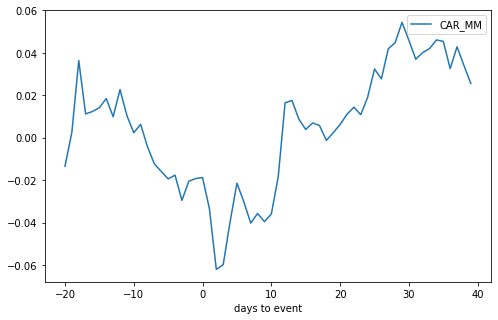

In [71]:
returnsinfyfinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

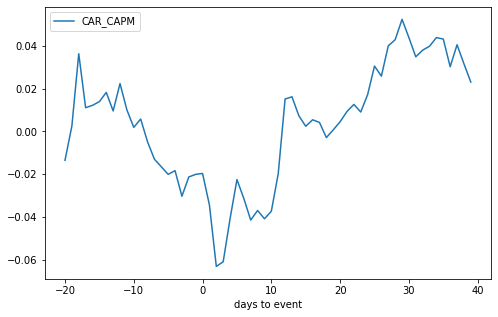

In [72]:
returnsinfyfinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

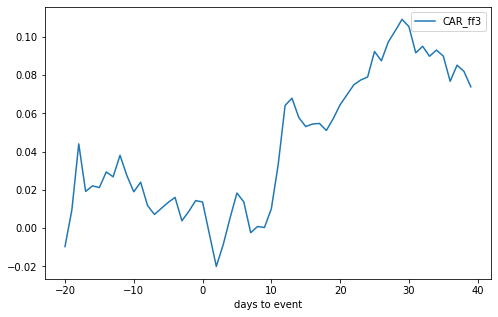

In [73]:
returnsinfyfinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

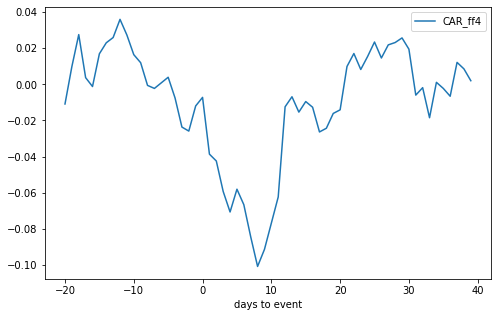

In [74]:
returnsinfyfinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

For all the 4 models, the figures suggest that the capital market perceives this event to be unfavourable for this particular security. At day 0, we see a downfall and soon the compmany seems to bounce back within the event window itself (0, 20 days).